In [1]:
import os
import numpy as np
import pandas as pd

root = "/kaggle/input/tuberculosis-tb-chest-xray-dataset"
normal_path = os.path.join(root, "TB_Chest_Radiography_Database/Normal")
tb_path = os.path.join(root, "TB_Chest_Radiography_Database/Tuberculosis")

In [2]:
normal_image_paths = [os.path.join(normal_path, filename) for filename in os.listdir(normal_path)]
tb_image_paths = [os.path.join(tb_path, filename) for filename in os.listdir(tb_path)]

normal_image_labels = [(path, 0) for path in normal_image_paths]
tb_image_labels = [(path, 1) for path in tb_image_paths]

all_image_labels = normal_image_labels + tb_image_labels

In [3]:
import random
import pandas as pd

random.seed(42)
random.shuffle(all_image_labels)
df = pd.DataFrame(all_image_labels, columns=['im_path', 'label'])

In [4]:
df.head()
#df.info()

,im_path,label
0,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0
1,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0
2,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0
3,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0
4,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0


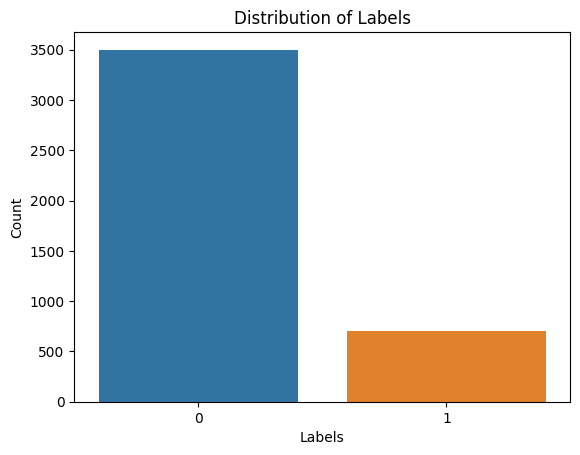

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [6]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def build_generator(latent_dim):
#     model = models.Sequential()
#     model.add(layers.Dense(256, input_dim=latent_dim, activation='relu'))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dense(1024, activation='relu'))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dense(256, activation='relu'))
#     model.add(layers.Dense(3*512*512, activation='sigmoid'))
#     model.add(layers.Reshape((512, 512, 3)))
#     return model

# def build_discriminator(input_shape):
#     model = models.Sequential()
#     model.add(layers.Flatten(input_shape=input_shape))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dense(256, activation='relu'))
#     model.add(layers.Dense(1, activation='sigmoid'))
#     return model

# def build_gan(generator, discriminator):
#     discriminator.trainable = False
#     model = models.Sequential()
#     model.add(generator)
#     model.add(discriminator)
#     return model

# discriminator = build_discriminator((512, 512, 3))
# discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# latent_dim = 100  # Latent dimension for generator input
# generator = build_generator(latent_dim)
# gan = build_gan(generator, discriminator)
# gan.compile(loss='binary_crossentropy', optimizer='adam')

# def train_gan(generator, discriminator, gan, minority_images, epochs, batch_size):
#     for epoch in range(epochs):
#         noise = np.random.normal(0, 1, (batch_size, latent_dim))
#         synthetic_images = generator.predict(noise)
#         x_combined = np.concatenate((minority_images, synthetic_images))
#         y_combined = np.concatenate((np.ones((len(minority_images), 1)), np.zeros((batch_size, 1))))
#         discriminator_loss = discriminator.train_on_batch(x_combined, y_combined)

#         noise = np.random.normal(0, 1, (batch_size, latent_dim))
#         y_generated = np.ones((batch_size, 1))
#         gan_loss = gan.train_on_batch(noise, y_generated)

#         print(f"Epoch {epoch + 1}/{epochs} -- D Loss: {discriminator_loss} -- G Loss: {gan_loss}")

# class_counts = df['label'].value_counts()
# minority_class = class_counts.idxmin()
# minority_df = df[df['label'] == minority_class]
# minority_class_images = ...  # Extract images from minority_df

# train_gan(generator, discriminator, gan, minority_class_images, epochs, batch_size)
# num_minority_samples = class_counts.min()
# synthetic_minority_images = generator.predict(np.random.normal(0, 1, (num_minority_samples, latent_dim)))
# minority_class_labels = minority_df['label'].values
# synthetic_minority_df = pd.DataFrame({'im_path': ['path_to_synthetic_image']*num_minority_samples, 'label': minority_class_labels})
# equalized_df = pd.concat([minority_df, synthetic_minority_df], ignore_index=True)

In [7]:
import math
import cv2
from tqdm import tqdm

output_folder = '/kaggle/working/norm_image'

batch_size=50
num_batches=math.ceil(df.shape[0]/batch_size)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


for i in tqdm(range(num_batches), desc="Processing batches"):
    batch_paths = df['im_path'].iloc[i * batch_size: (i + 1) * batch_size]
    
    for img_path in batch_paths:
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        normalized_image = cv2.equalizeHist(image) 
        downsampled_image = cv2.resize(normalized_image, (128,128))
        filename = os.path.basename(img_path)
        new_img_path = os.path.join(output_folder, filename)
        cv2.imwrite(new_img_path, downsampled_image)

        df.loc[df['im_path'] == img_path, 'im_path'] = new_img_path


Processing batches: 100%|██████████| 84/84 [01:24<00:00,  1.01s/it]


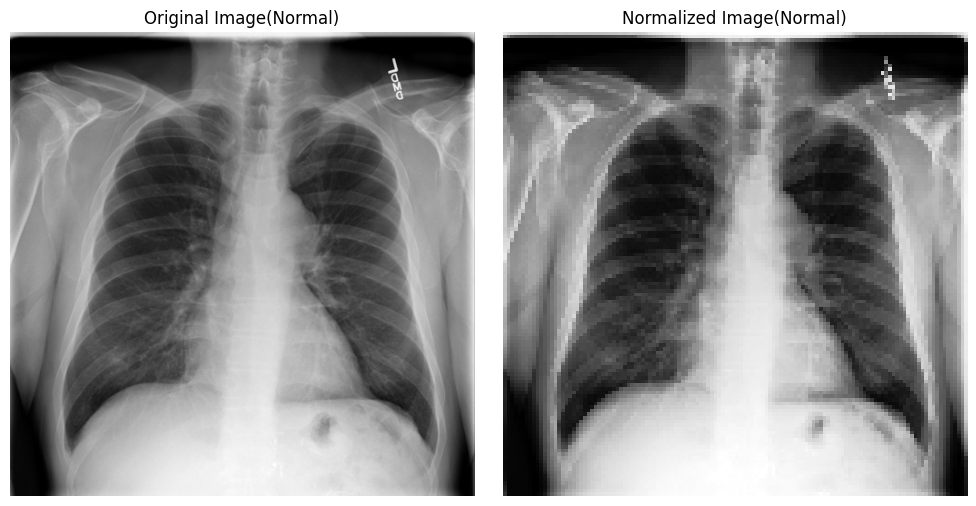

In [8]:
index_to_visualize = 16

normalized_image_path = df['im_path'].iloc[index_to_visualize]
filename = os.path.basename(normalized_image_path)


if 'Normal' in filename:
    original_image_path = os.path.join(normal_path, filename)
    image_class = 'Normal'

elif 'Tuberculosis' in filename:
    original_image_path = os.path.join(tb_path, filename)
    image_class = 'TB'

original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
normalized_image = cv2.imread(normalized_image_path, cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image(' + image_class + ')')
axes[0].axis('off')

axes[1].imshow(normalized_image, cmap='gray')
axes[1].set_title('Normalized Image(' + image_class + ')')
axes[1].axis('off')

plt.tight_layout()
plt.show()


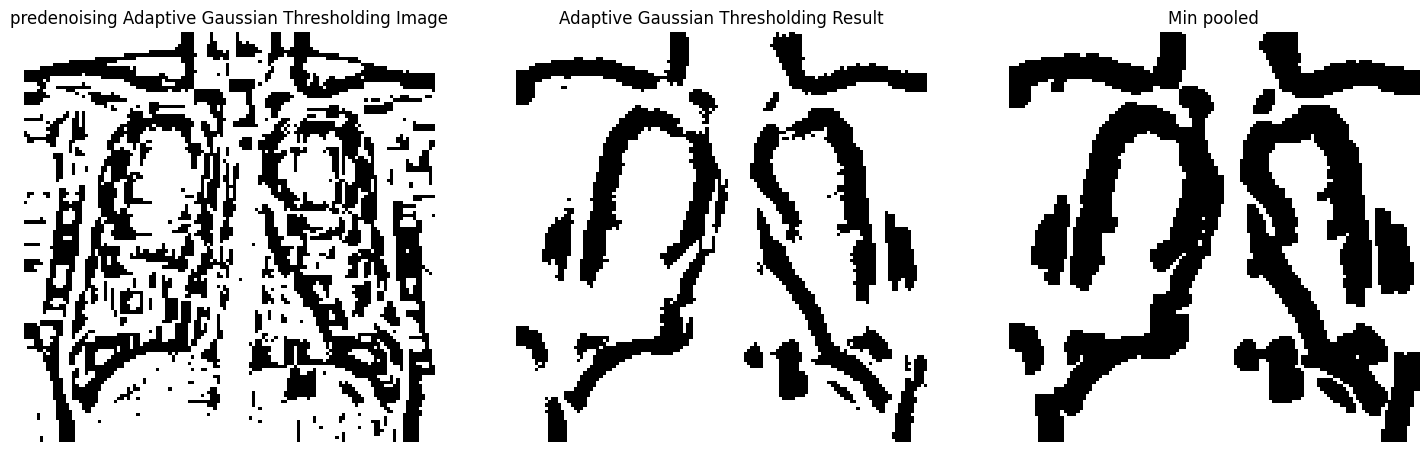

In [9]:
import matplotlib.pyplot as plt

noisy_image = cv2.imread(normalized_image_path, cv2.IMREAD_GRAYSCALE)
min_pool = cv2.erode(noisy_image, np.ones((7, 7), np.uint8))
denoised_image = cv2.fastNlMeansDenoising(min_pool, None, h=20, templateWindowSize=9, searchWindowSize=11)
prenoise_adaptive_thresh = cv2.adaptiveThreshold(min_pool, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

adaptive_thresh = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#denoised_image2 = cv2.fastNlMeansDenoising(adaptive_thresh, None, h=10, templateWindowSize=10, searchWindowSize=21)
min_pooled1 = cv2.erode(adaptive_thresh, np.ones((3, 3), np.uint8))


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(prenoise_adaptive_thresh, cmap='gray')
plt.title('predenoising Adaptive Gaussian Thresholding Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Gaussian Thresholding Result')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(min_pooled1, cmap='gray')
plt.title('Min pooled')
plt.axis('off')

plt.show()


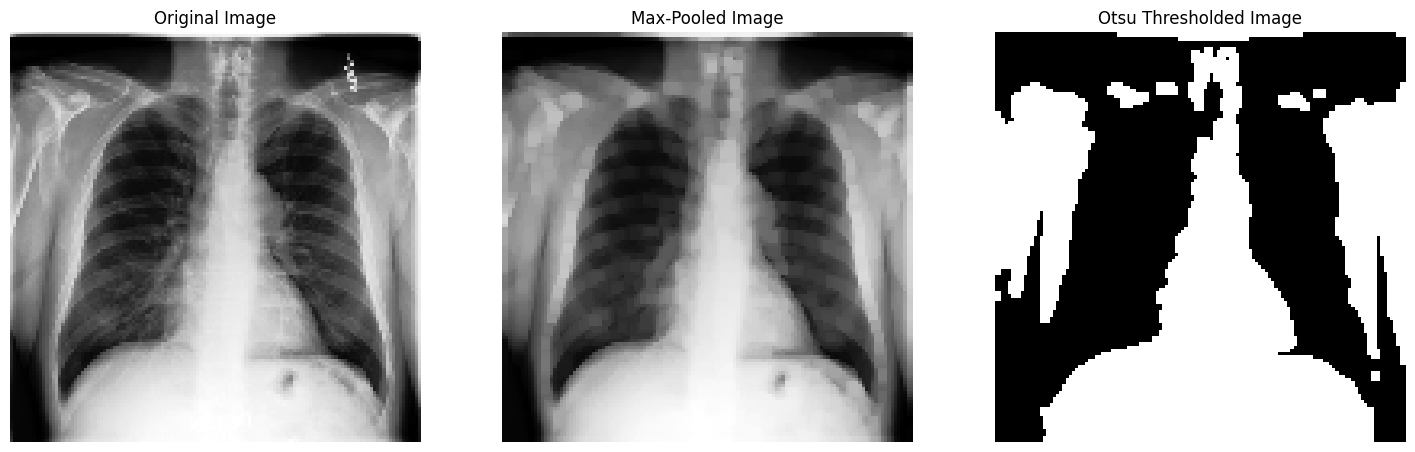

In [10]:
image = cv2.imread(normalized_image_path, cv2.IMREAD_GRAYSCALE)

min_pooled1 = cv2.erode(image, np.ones((3, 3), np.uint8))
max_pooled1 = cv2.dilate(min_pooled1, np.ones((3, 3), np.uint8))
#min_pooled2 = cv2.erode(max_pooled1, np.ones((7, 7), np.uint8))
#max_pooled2 = cv2.dilate(min_pooled2, np.ones((7, 7), np.uint8))
#min_pooled3 = cv2.erode(max_pooled2, np.ones((7, 7), np.uint8))
#max_pooled3 = cv2.dilate(min_pooled3, np.ones((7, 7), np.uint8))

_, otsu_thresholded = cv2.threshold(max_pooled1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_pooled1, cmap='gray')
plt.title('Max-Pooled Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title('Otsu Thresholded Image')
plt.axis('off')

plt.show()


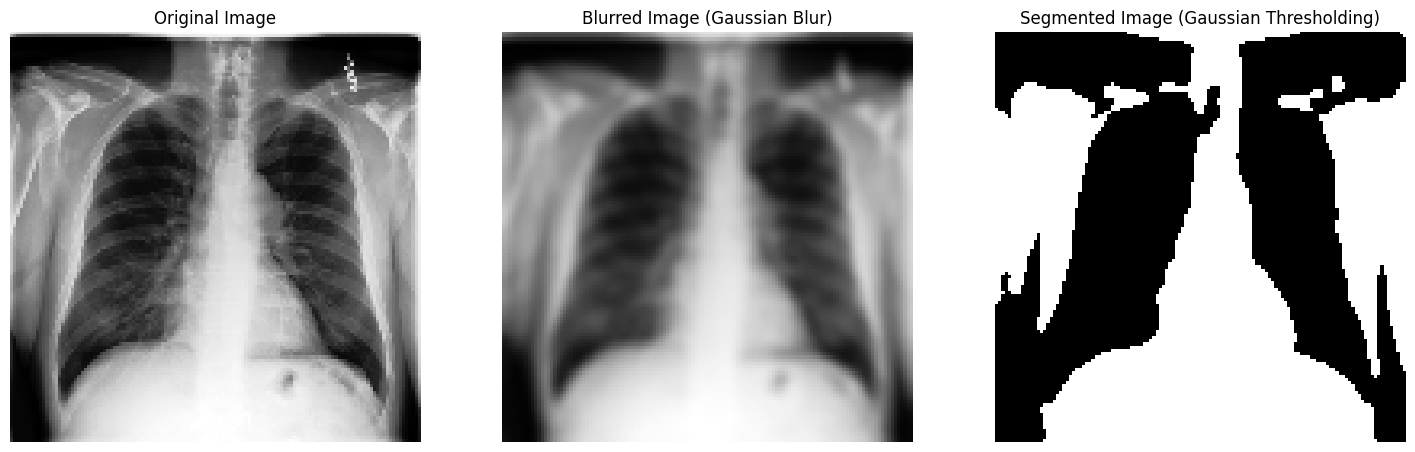

In [11]:
image = cv2.imread(normalized_image_path, cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

_, segmented_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Gaussian Thresholding)')
plt.axis('off')

plt.show()


In [12]:
import os

output_folder = '/kaggle/working/hstacked'
x = 0

def create_combined_image(normalized_image, min_pooled, gaussian_otsu, min_pooled_otsu):
    normalized_image = normalized_image.astype(np.uint8)
    min_pooled = min_pooled.astype(np.uint8)
    gaussian_otsu = gaussian_otsu.astype(np.uint8)
    min_pooled_otsu = min_pooled_otsu.astype(np.uint8)
    combined_image = np.concatenate((normalized_image[:, :, np.newaxis], min_pooled[:, :, np.newaxis], 
                                     gaussian_otsu[:, :, np.newaxis], min_pooled_otsu[:, :, np.newaxis]), axis=2)
    global x
    x = combined_image.shape
    return combined_image

batch_size = 50
num_batches = math.ceil(df.shape[0] / batch_size)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

e_kernel = np.ones((3, 3), np.uint8)
d_kernel = np.ones((3, 3), np.uint8)
for i in tqdm(range(num_batches), desc="Processing batches"):
    batch_paths = df['im_path'].iloc[i * batch_size: (i + 1) * batch_size]
    
    for img_path in batch_paths:
        if not os.path.exists(img_path):
            print(f"Image path '{img_path}' does not exist.")
            continue
        
        normalized_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if normalized_image is None:
            print(f"Failed to read image at path '{img_path}'. Skipping...")
            continue
        
        min_pool = cv2.erode(normalized_image, e_kernel)
        denoised_image = cv2.fastNlMeansDenoising(min_pool, None, h=20, templateWindowSize=10, searchWindowSize=11)
        adaptive_thresh = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        min_pooled1 = cv2.erode(adaptive_thresh, np.ones((3, 3), np.uint8))

        blurred_image = cv2.GaussianBlur(normalized_image, (7, 7), 0)
        _, gaussian_otsu = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        max_pooled1 = cv2.dilate(min_pool, d_kernel)
        _, min_pooled_otsu = cv2.threshold(max_pooled1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        combined_image = create_combined_image(normalized_image, min_pooled1, gaussian_otsu, min_pooled_otsu)
        
        filename = os.path.basename(img_path)
        combined_img_path = os.path.join(output_folder, filename)
        cv2.imwrite(combined_img_path, combined_image)

        df.loc[df['im_path'] == img_path, 'im_path'] = combined_img_path

print(x)


Processing batches: 100%|██████████| 84/84 [01:05<00:00,  1.29it/s]

(128, 128, 4)


In [13]:
import os

example_img_path = df['im_path'].iloc[1]
print(example_img_path)

if os.path.exists(example_img_path):
    example_img = cv2.imread(example_img_path, cv2.IMREAD_UNCHANGED)
    
    if example_img is not None:
        print(example_img)
        print("Image shape:", example_img.shape)
    else:
        print(f"Failed to read image at path '{example_img_path}'")
else:
    print(f"The file at path '{example_img_path}' does not exist.")


/kaggle/working/hstacked/Normal-2081.png
[[[  5 255   0   0]
  [  0 255   0   0]
  [  0 255   0   0]
  ...
  [108 255   0   0]
  [116 255   0   0]
  [129 255   0   0]]

 [[  0 255   0   0]
  [  0 255   0   0]
  [  0 255   0   0]
  ...
  [  0 255   0   0]
  [  0 255   0   0]
  [  0 255   0   0]]

 [[  0 255   0   0]
  [  0 255   0   0]
  [  0 255   0   0]
  ...
  [  0 255   0   0]
  [  0 255   0   0]
  [  0 255   0   0]]

 ...

 [[ 12   0   0   0]
  [ 20   0   0   0]
  [ 54   0   0   0]
  ...
  [  1   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  9   0   0   0]
  [ 14   0   0   0]
  [ 46   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0 255   0   0]]

 [[ 11   0   0   0]
  [ 14   0   0   0]
  [ 44   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0 255   0   0]]]
Image shape: (128, 128, 4)


In [14]:
from sklearn.utils import resample


normal_images = df[df['label'] == 0]
tb_images = df[df['label'] == 1]

normal_count = len(normal_images)
tb_count = len(tb_images)
if normal_count < tb_count:
    max_label = tb_images
    min_label = normal_images
else:
    max_label = normal_images
    min_label = tb_images
    
tb_oversampled = resample(min_label, replace=True, n_samples=len(max_label), random_state=42)

balanced_df = pd.concat([normal_images, tb_oversampled])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
df = balanced_df

In [15]:
df.shape

(7000, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
keras.utils.set_random_seed(42)

batch_size = 10
num_classes = 2
epochs = 100

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(128, 128, 4)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128,128, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='sigmoid'),
    #layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_paths, val_paths, train_labels, val_labels = train_test_split(df['im_path'], df['label'],
                                                                    test_size=0.2, random_state=42)

def data_generator(image_paths, labels, batch_size):
    while True:
        for start in range(0, len(image_paths), batch_size):
            images = []
            for img_path in image_paths[start:start + batch_size]:
                img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
                images.append(img)
            images = np.array(images) / 255.0
            labels_batch = np.array(labels[start:start + batch_size])
            yield images, labels_batch

train_generator = data_generator(train_paths, train_labels, batch_size)
val_generator = data_generator(val_paths, val_labels, batch_size)

history = model.fit(train_generator,
                    steps_per_epoch=len(train_paths) // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=len(val_paths) // batch_size)

test_loss, test_acc = model.evaluate(val_generator, steps=len(val_paths) // batch_size)
print("Test accuracy:", test_acc)

model.save('hstacked_classifier.keras')


2024-04-12 07:27:37.302534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 07:27:37.302660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 07:27:37.428908: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


560/560 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.6587 - loss: 0.6563 - val_accuracy: 0.8114 - val_loss: 0.4466
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8434 - loss: 0.3824 - val_accuracy: 0.8771 - val_loss: 0.2667
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8922 - loss: 0.2851 - val_accuracy: 0.9250 - val_loss: 0.1991
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9076 - loss: 0.2349 - val_accuracy: 0.9257 - val_loss: 0.1886
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9161 - loss: 0.2280 - val_accuracy: 0.9307 - val_loss: 0.1887
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9305 - loss: 0.1921 - val_accuracy: 0.9500 - val_loss: 0.1504
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9357 - loss: 0.1745 - val_accuracy: 0.9557 - val_loss: 0.1325
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9464 - loss: 0.1435 - val_accurac

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, models
# from sklearn.model_selection import train_test_split
# import cv2
# import numpy as np
# import itertools
# from tqdm import tqdm

# # Set random seed for reproducibility
# tf.random.set_seed(42)

# batch_size = 10
# num_classes = 2
# epochs = 10

# # Define data augmentation pipeline
# data_augmentation = keras.Sequential([
#     layers.RandomFlip("horizontal", input_shape=(128, 128, 4)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
# ])

# # Split data into training and validation sets
# train_paths, val_paths, train_labels, val_labels = train_test_split(df['im_path'], df['label'], test_size=0.2, random_state=42)

# # Define data generators
# def data_generator(image_paths, labels, batch_size):
#     while True:
#         for start in range(0, len(image_paths), batch_size):
#             images = []
#             for img_path in image_paths[start:start + batch_size]:
#                 img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
#                 images.append(img)
#             images = np.array(images) / 255.0  # Normalize pixel values
#             labels_batch = np.array(labels[start:start + batch_size])
#             yield images, labels_batch

# train_generator = data_generator(train_paths, train_labels, batch_size)
# val_generator = data_generator(val_paths, val_labels, batch_size)

# # Define possible activation functions for each Conv2D layer
# possible_activations = [['relu', 'tanh', 'sigmoid'],  # Activation functions for the first Conv2D layer
#                         ['relu', 'tanh', 'sigmoid'],  # Activation functions for the second Conv2D layer
#                         ['relu', 'tanh', 'sigmoid']]  # Activation functions for the third Conv2D layer

# best_accuracy = 0.0
# best_activation_combination = None

# # Initialize tqdm loop
# total_combinations = len(list(itertools.product(*possible_activations)))
# pbar = tqdm(total=total_combinations, desc="Combination Progress", position=0)

# # Iterate over all possible combinations of activation functions
# for activations in itertools.product(*possible_activations):
#     # Create model
#     model = models.Sequential([
#         data_augmentation,
#         layers.Conv2D(128, (3, 3), activation=activations[0], input_shape=(128, 128, 4)),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(128, (3, 3), activation=activations[1]),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(128, (3, 3), activation=activations[2]),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(64, activation='tanh'),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation='sigmoid'),
#     ])
    
#     # Compile model
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
    
#     # Train the model
#     history = model.fit(train_generator,
#                         steps_per_epoch=len(train_paths) // batch_size,
#                         epochs=epochs,
#                         validation_data=val_generator,
#                         validation_steps=len(val_paths) // batch_size,
#                         verbose=0)
    
#     # Evaluate the model on the validation dataset
#     val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_paths) // batch_size, verbose=0)
    
#     # Check if the current model's validation accuracy is better than the previous best
#     if val_accuracy > best_accuracy:
#         best_accuracy = val_accuracy
#         best_activation_combination = activations
#         best_model = model
    
#     # Update tqdm progress bar
#     pbar.update(1)
    
# # Close tqdm loop
# pbar.close()

# # Print best activation combination and corresponding accuracy
# print(f'Best activation combination: {best_activation_combination}')
# print(f'Validation accuracy with best activation combination: {best_accuracy}')

# # Save the best performing model
# best_model.save('best_model.keras')
